In [1]:
# 导入
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
import warnings
warnings.filterwarnings("ignore")

In [2]:
error_list=['物料推送装置故障1001',
'物料检测装置故障2001',
'填装装置检测故障4001',
'填装装置定位故障4002',
'填装装置填装故障4003',
'加盖装置定位故障5001',
'加盖装置加盖故障5002',
'拧盖装置定位故障6001',
'拧盖装置拧盖故障6002'
]

In [3]:
def count(df):
    # 找到具有最大'时间'的行，并同时保留合格数和不合格数
    df = df.loc[df.groupby('日期')['时间'].idxmax()].reset_index()
    # 计算总产量（合格数 + 不合格数）和合格率
    df["总产量"] = df["合格数"] + df["不合格数"]
    df["合格率"] = df["合格数"] / df["总产量"]
    df['平均产量'] = df["总产量"]
    # 按生产线分组，计算平均产量和合格率
    grouped = df.groupby("生产线编号").agg({
        "总产量": "sum",
        '平均产量':'mean',
        "合格率": "mean",
        '合格数':'sum'
    }).reset_index()
    return grouped


In [4]:
list_df=[]
df_age = pd.read_excel('./data/附件3/操作人员信息表.xlsx')
for i in range(1,11):
    name = 'M'+ str(300+i) +'.csv'
    df_name = './data/附件3/'+ name
    df = pd.read_csv(df_name)   
    grouped = count(df)
    # 合并两个DataFrame，仅保留生产线编号为“M301”的行
    df_data = pd.merge(grouped, df_age[["生产线编号", "工龄"]], on="生产线编号", how="left")
    list_df.append(df_data)
    print(df_name)

./data/附件3/M301.csv
./data/附件3/M302.csv
./data/附件3/M303.csv
./data/附件3/M304.csv
./data/附件3/M305.csv
./data/附件3/M306.csv
./data/附件3/M307.csv
./data/附件3/M308.csv
./data/附件3/M309.csv
./data/附件3/M310.csv


In [5]:
merged_df = pd.concat(list_df)

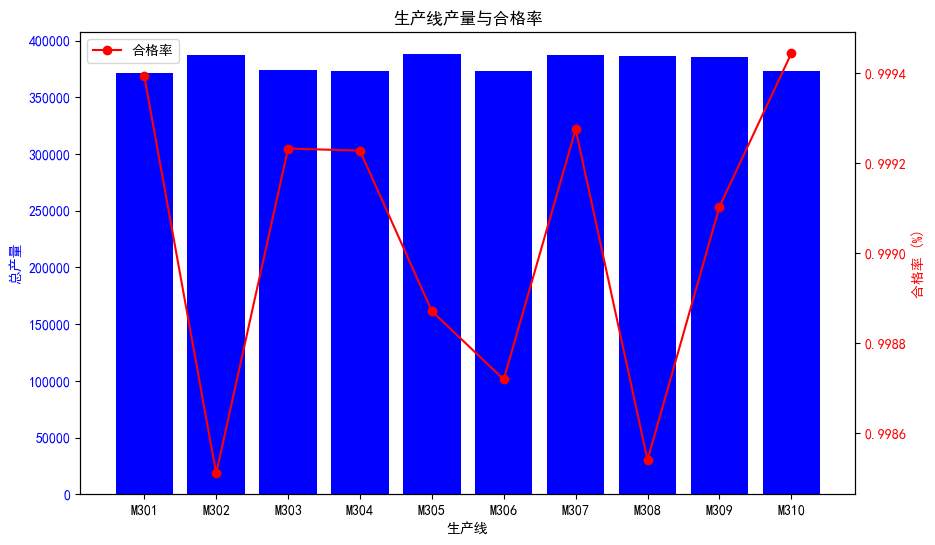

In [6]:
# 创建一个图形和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 产量的柱状图
ax1.bar(merged_df["生产线编号"], merged_df["总产量"], label="总产量", color="b")
ax1.set_xlabel("生产线")
ax1.set_ylabel("总产量", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# 创建第二个y轴用于合格率
ax2 = ax1.twinx()
ax2.plot(merged_df["生产线编号"], merged_df["合格率"], marker="o", color="r", label="合格率")
ax2.set_ylabel("合格率 (%)", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# 设置标题和图例
plt.title("生产线产量与合格率")
plt.legend(loc="upper left")

# 显示图形
plt.show()

In [7]:
merged_df

,生产线编号,总产量,平均产量,合格率,合格数,工龄
0,M301,371442,1428.623077,0.999394,371218,1
0,M302,387610,1490.807692,0.998510,387032,5
0,M303,373749,1437.496154,0.999233,373461,6
0,M304,373078,1434.915385,0.999228,372790,4
0,M305,387871,1491.811538,0.998871,387433,2
0,M306,373165,1435.250000,0.998719,372688,3
0,M307,386919,1488.150000,0.999276,386638,4
0,M308,386282,1485.700000,0.998540,385718,1
0,M309,385731,1483.580769,0.999103,385385,2
0,M310,373626,1437.023077,0.999444,373419,5


In [8]:
df = merged_df

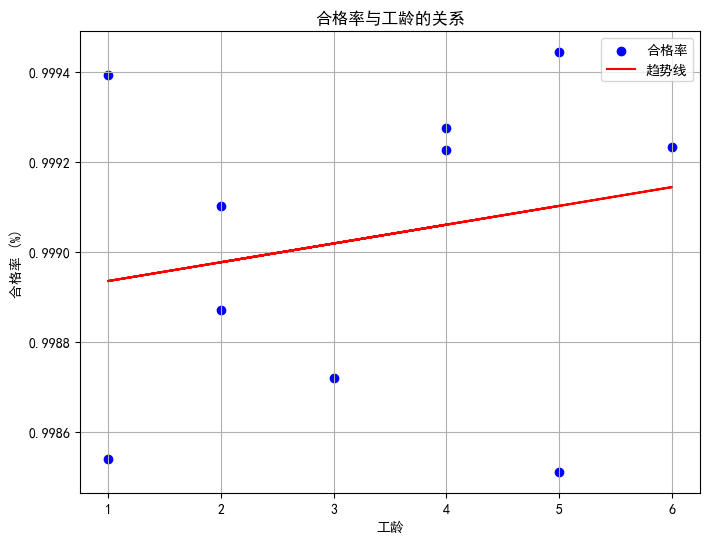

In [9]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(df["工龄"], df["合格率"], color="b", label="合格率")
plt.xlabel("工龄")
plt.ylabel("合格率 (%)")
plt.title("合格率与工龄的关系")
plt.grid(True)

# 添加趋势线（线性回归）
import numpy as np
from sklearn.linear_model import LinearRegression

X = df["工龄"].values.reshape(-1, 1)
y = df["合格率"].values

regressor = LinearRegression()
regressor.fit(X, y)

# 预测工龄对应的合格率
predicted_qualification_rate = regressor.predict(X)

# 绘制趋势线
plt.plot(X, predicted_qualification_rate, color="r", label="趋势线")

# 显示图例
plt.legend()

# 显示图形
plt.show()

In [10]:
df1 = df.drop(['生产线编号'],axis = 1)
correlation_matrix = df1.corr()
correlation_matrix


,总产量,平均产量,合格率,合格数,工龄
总产量,1.000000,1.000000,-0.541293,0.999884,-0.215082
平均产量,1.000000,1.000000,-0.541293,0.999884,-0.215082
合格率,-0.541293,-0.541293,1.000000,-0.528415,0.212867
合格数,0.999884,0.999884,-0.528415,1.000000,-0.213375
工龄,-0.215082,-0.215082,0.212867,-0.213375,1.000000


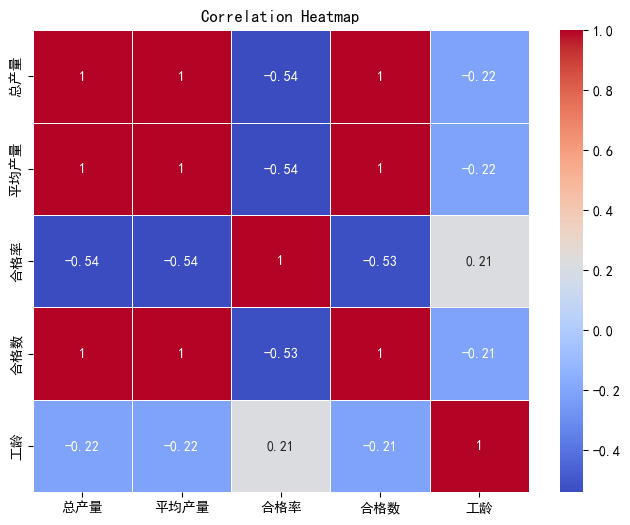

In [11]:
# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

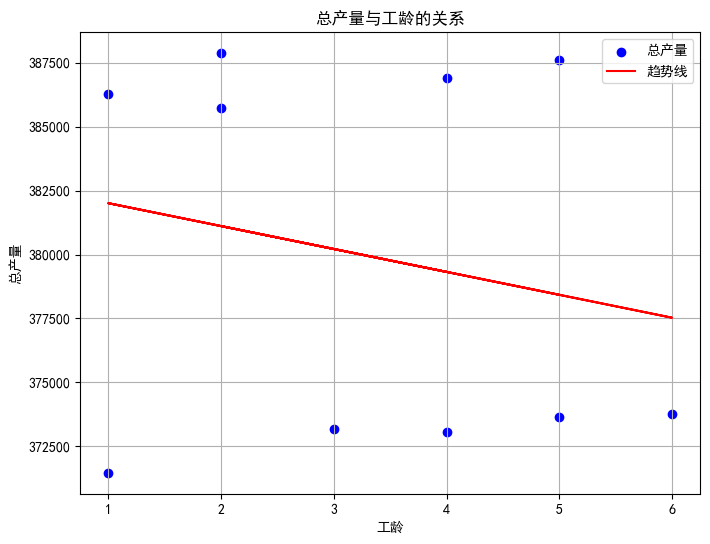

In [14]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(df["工龄"], df["总产量"], color="b", label="总产量")
plt.xlabel("工龄")
plt.ylabel("总产量")
plt.title("总产量与工龄的关系")
plt.grid(True)

# 添加趋势线（线性回归）
import numpy as np
from sklearn.linear_model import LinearRegression

X = df["工龄"].values.reshape(-1, 1)
y = df["总产量"].values

regressor = LinearRegression()
regressor.fit(X, y)

# 预测工龄对应的合格率
predicted_qualification_rate = regressor.predict(X)

# 绘制趋势线
plt.plot(X, predicted_qualification_rate, color="r", label="趋势线")

# 显示图例
plt.legend()

# 显示图形
plt.show()

In [13]:
merged_df.to_csv('peo_info.csv')